# Compressive Sensing

---

The task is to extract images or signals accurately and even exactly from a number of
samples which is far smaller than the desired resolution of the image/signal, e.g., the
number of pixels in the image. This new technique draws from results in several fields

Suppose we are given a sparse signal.

_Can we recover the signal with small number of measurements 
(far smaller than the desired resolution of the signal)?_

The answer is YES, for some signals and carefully selected measurements using $l_1$ minimization.


## Prerequisites

The reader should be familiar to elementary concepts about signals, with linear algebra concepts, and linear programming.

## Competences 

The reader should be able to recover a signal from a small number of measurements.

## References

For more details see

* [E. Candès and M. Wakin, An Introduction To Compressive Sampling][CW08],
* [M. Davenport et al., Introduction to Compressed Sensing][DDEK12]
* [O. Holtz, Compressive sensing: a paradigm shift in signal processing][Hol08], 
* and the extensive list of [Compressive Sensing Resources](http://dsp.rice.edu/cs).



__Credits__: Daniel Bragg, an IASTE Intern, performed testing of some of the methods.

[CW08]: http://dsp.rice.edu/files/cs/CSintro.pdf "Emmanuel J. Candès and Michael B. Wakin, 'An Introduction To Compressive Sampling',  IEEE Signal Processing Magazine, 25(2) (2008) 21-30."

[DDEK12]: http://statweb.stanford.edu/~markad/publications/ddek-chapter1-2011.pdf "Mark A. Davenport, Marco F. Duarte, Yonina C. Eldar and Gitta Kutyniok, 'Introduction to Compressed Sensing', in: Compressed Sensing - Theory and Applications, Cambridge University Press, 2012." 

[Hol08]: http://arxiv.org/abs/0812.3137 "Olga Holtz, 'Compressive sensing: a paradigm shift in signal processing', arXiv:0812.3137, 2008."  

## Underdetermined systems

Let $A\in\mathbb{R}^{m\times n}$ with $m<n$, $x\in\mathbb{R}^n$ and $b\in\mathbb{R}^m$.

### Definitions

The system $Ax=b$ is __underdetermined__.

$\|x\|_0$ is the number of nonzero entries of $x$ (_a quasi-norm_).

A matrix $A$ satisfies the __restricted isometry property__ (RIP) of order $k$ with constant $\delta_k\in(0,1)$ 
if 
$$
(1 − \delta_k )\|x\|_2^2 \leq \| Ax\|_2^2 \leq (1 + \delta_k)\| x\|_2^2
$$
for any $x$ such that $\|x\|_0 \leq k$.

A __mutual incoherence__ of a matrix $A$ is 
$$
\mathcal{M}(A)= \max_{i \neq j} |[A^TA]_{ij}|,
$$
that is, the absolutely maximal inner product of distinct columns of $A$. If the columns of $A$ have unit
norms, $\mathcal{M}(A)\in[0,1]$.

The __spark__ of a given matrix $A$, $spark(A)$, is the smallest number of columns of $A$ that are linearly dependant.


### Facts

1. An underdetermined system either has no solution or has infinitely many solutions. 

2. The typical problem is to choose the solution of some minimal norm. This problem can be reformulated as a
constrained optimization problem
$$
\textrm{minimize}\ \|x\| \quad \textrm{subject to} \quad Ax=b.
$$
In particular:
    3. For the 2-norm, the $l_2$ minimization problem is solved by SVD: let $\mathop{\mathrm{rank}}(A)=r$ and let
$A=U\Sigma V^T$ be the SVD of $A$. Then 
$$
x=\sum_{k=1}^r \frac{U[:,k]^Tb}{\sigma_k} V[:,k].
$$
    2. For the 1-norm, the $l_1$ minimization problem is a __linear programming__ problem
    $$\textrm{minimize}\ \ c^T x \quad \textrm{subject to} \quad Ax=b,\ x\geq 0,$$
    for $c^T=\begin{bmatrix}1 & 1 & \cdots & 1 \end{bmatrix}$.
    3. For the 0-norm, the $l_0$ problem (which appears in compressive sensing)
    $$
    \textrm{minimize}\ \|x\|_0 \quad \textrm{subject to} \quad Ax=b,
    $$
    is NP-hard.
4. It holds $spark(A)\in[2,m+1]$.
5. For any vector $b$, there exists at most one vector $x$ such that $\|x\|_0\leq k$ and 
$Ax=b$ if and only if $spark(A) > 2k$. This implies that $m\geq 2k$, which is a good choice when we are computing solutions which are exactly sparse.

6. If $k<\displaystyle \frac{1}{2} \left(1+\frac{1}{\mathcal{M}(A)}\right)$, then for any vector $b$ there exists at most one vector $x$ such that $\|x\|_0\leq k$ and $Ax=b$.

7. If the solution $x$ of $l_0$ problem satisfies 
$\|x\|_0 < \displaystyle \frac{\sqrt{2}-1/2}{\mathcal{M}(A)}$, 
then the solution of $l_1$ problem is the solution of $l_0$ problem!

7. If $A$ has columns of unit-norm, then $A$ satisfies the RIP of order $k$ with 
$\delta_k = (k − 1)\mathcal{M}(A)$  for all $k < 1/\mathcal{M}(A)$.

8. If $A$ satisfies RIP of order $2k$ with $\delta_{2k}<\sqrt{2}-1$, then the solution of $l_1$ problem is the solution of $l_0$ problem! 

9. Checking whether the specific matrix has RIP is difficult. 
If $m ≥ C \cdot k \log\left(\displaystyle\frac{n}{k}\right)$, where $C$ is some constant depending on each instance, the following classes of matrices satisfy RIP with $\delta_{2k}<\sqrt{2}-1$ with overwhelming probability(the matrices are normalised to have columns with unit norms):
    1. Form $A$ by sampling at random $n$ column vectors on the unit sphere in $\mathbb{R}^m$.
    2. Form $A$ by sampling entries from the normal distribution with mean 0 and variance 
    $1/ m$.
    3. Form $A$ by sampling entries from a symmetric Bernoulli distribution
    $P(A_{ij} = ±1/\sqrt{m}) = 1/2$.
    4. Form $A$ by sampling at random $m$ rows of the Fourier matrix.

10. The __compressive sensing__ interpretation is the following: the signal $x$ is reconstructed from samples with $m$ __functionals__ (the rows of $A$). 
 

### Example - $l_2$ minimization

In [1]:
A=rand(5,8)
b=rand(5)
A,b

(
[0.45689 0.0657075 … 0.904136 0.764916; 0.811112 0.71831 … 0.87371 0.374677; … ; 0.869581 0.663793 … 0.879676 0.146271; 0.725753 0.829219 … 0.151504 0.323004],

[0.12155,0.71366,0.807217,0.333872,0.889125])

In [2]:
x=A\b
U,σ,V=svd(A)
norm(A*x-b), norm( sum( [(U[:,k]'*b/σ[k])[1]*V[:,k]  for k=1:5])-x)
x

8-element Array{Float64,1}:
 -0.309813
  0.92583 
 -0.640284
 -0.124697
  0.748524
  0.247579
  0.137821
  0.239996

### Examples - Exact sparse signal recovery

We recover randomly generated sparse signals "measured" with rows of the matrix $A$. 
The experiment is performed for types of matrices from Fact 9.

The $l_1$ minimization problem is solved using the function `linprog()` from the package 
[MathProgBase.jl](https://github.com/JuliaOpt/MathProgBase.jl). This function requires the linear programming solver from the package [Clp.jl](https://github.com/JuliaOpt/Clp.jl)  be installed beforehand (it is a longer compilation).

Random matrices are generated using the package [Distributions.jl](https://github.com/JuliaStats/Distributions.jl).

For more details see the [documentation](http://mathprogbasejl.readthedocs.io/en/latest/index.html).

In [4]:
using Winston
using Clp
using MathProgBase
using Distributions

INFO: Precompiling module Clp.


In [5]:
whos(MathProgBase)

                  MathProgBase    280 KB     Module
                       buildlp      0 bytes  MathProgBase.HighLevelInterface.#b…
                       linprog      0 bytes  MathProgBase.HighLevelInterface.#l…
                    mixintprog      0 bytes  MathProgBase.HighLevelInterface.#m…
                      quadprog      0 bytes  MathProgBase.HighLevelInterface.#q…
                       solvelp      0 bytes  MathProgBase.HighLevelInterface.#s…


In [6]:
# Small example
l1 = linprog([-1,0],[2 1],'<',1.5)

MathProgBase.HighLevelInterface.LinprogSolution(:Optimal,-0.75,[0.75,0.0],Dict{Any,Any}(Pair{Any,Any}(:redcost,[0.0,0.5]),Pair{Any,Any}(:lambda,[-0.5])))

In [7]:
fieldnames(l1)

4-element Array{Symbol,1}:
 :status
 :objval
 :sol   
 :attrs 

In [8]:
# Random vectors on a unit sphere
n=100
m=40
k=15
A=svd(rand(m,n))[3]'

40×100 Array{Float64,2}:
 -0.105469    -0.0938731  -0.117083    …  -0.0934742   -0.0958057 
 -0.0429379   -0.174382   -0.0726577       0.0423266   -0.0426354 
 -0.208745    -0.132468   -0.037006       -0.104093    -0.0316426 
  0.0124181    0.157429   -0.289391       -0.05297      0.0946204 
  0.12609     -0.0500143  -0.0781897      -0.00252131   0.103222  
  0.0523003   -0.192792   -0.0616354   …  -0.0211171   -0.0276395 
  0.029313     0.0183521  -0.142383       -0.112005    -0.0292328 
 -0.03279     -0.0794959  -0.0694973       0.0104122   -0.0463539 
 -0.0673895   -0.0037161   0.0609012      -0.0181013   -0.0748549 
  0.105229    -0.132851    0.181841       -0.0559732   -0.00930498
  0.008664    -0.0472711   0.0404159   …   0.00463458   0.17782   
 -0.00461524  -0.125466    0.0351335      -0.0912936    0.107416  
  0.00741449   0.0239696  -0.0777015      -0.230093     0.0589699 
  ⋮                                    ⋱                          
 -8.13287e-5  -0.142678    0.134277  

In [10]:
for i=1:size(A,2)
    A[:,i]=A[:,i]/norm(A[:,i])
end
A

40×100 Array{Float64,2}:
 -0.186445    -0.157428    -0.192152    …  -0.147889    -0.171155  
 -0.0759042   -0.292444    -0.119243        0.0669666   -0.0761673 
 -0.369012    -0.222153    -0.0607326      -0.164689    -0.056529  
  0.0219522    0.264013    -0.474936       -0.083806     0.169038  
  0.222897    -0.0838757   -0.128322       -0.00398907   0.184404  
  0.0924546   -0.323319    -0.101153    …  -0.0334103   -0.0493774 
  0.0518186    0.0307771   -0.233673       -0.177208    -0.0522239 
 -0.0579651   -0.133317    -0.114056        0.0164736   -0.0828104 
 -0.119129    -0.00623203   0.0999484      -0.0286388   -0.133727  
  0.18602     -0.222796     0.298429       -0.0885574   -0.0166232 
  0.0153159   -0.0792753    0.0663289   …   0.00733256   0.317673  
 -0.00815866  -0.21041      0.0576595      -0.144439     0.191897  
  0.0131071    0.0401979   -0.12752        -0.364039     0.105349  
  ⋮                                     ⋱                          
 -0.00014377  -0.239275

In [11]:
# Check incoherence
μ=maxabs(A'*A-I)

0.4733741767397629

In [12]:
# Compute a random vector
xs=sprand(n,1,k/n)
@show nnz(xs)
x=vec(full(xs))

nnz(xs) = 15


100-element Array{Float64,1}:
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.98427 
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 ⋮       
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.869658
 0.0     
 0.0     
 0.0     
 0.0     
 0.426001
 0.0     

In [13]:
# Sampling
b=A*x

40-element Array{Float64,1}:
 -1.45192   
 -0.00435116
 -0.167072  
 -1.05581   
  0.373968  
 -0.0857746 
  0.582383  
  0.415105  
  0.503553  
 -0.827224  
 -0.110227  
 -0.0290814 
  0.139867  
  ⋮         
 -0.190017  
 -0.683236  
  0.320221  
 -0.320819  
 -0.244622  
  0.0329072 
 -0.24387   
  0.635037  
  0.483778  
  0.363191  
  0.193706  
 -0.228227  

In [14]:
# Recovery
c=ones(n)
l1=linprog(c,A,'=',b,0,Inf)

MathProgBase.HighLevelInterface.LinprogSolution(:Optimal,9.096480903984117,[0.0,0.0,0.0,0.0,0.0,0.0,0.98427,0.0,0.0,0.0  …  0.0,0.0,0.0,0.869658,0.0,0.0,0.0,0.0,0.426001,0.0],Dict{Any,Any}(Pair{Any,Any}(:redcost,[1.67258,1.21412,1.64362,3.60252,2.44422,3.44749,0.0,1.39738,1.30324,0.0  …  0.0,0.875332,1.82309,0.0,2.42196,1.67134,1.90025,1.70954,0.0,0.0]),Pair{Any,Any}(:lambda,[0.0,0.757207,0.943476,-0.720494,0.877505,0.0306666,1.25369,0.58567,1.72275,0.108975  …  0.0,0.609365,0.0,0.0,0.0,-0.316282,0.980149,1.85915,0.293554,0.0])))

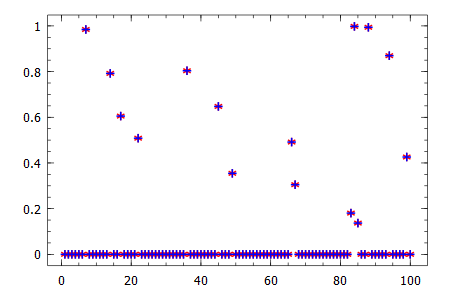

In [15]:
# Check
plot(collect(1:n),x,"r*", collect(1:n),l1.sol,"b+")

In [16]:
# Let us make some more tests
using Interact

Interact.Slider{Int64}(Signal{Int64}(250, nactions=0),"n",250,50:50:500,"d",true)

Interact.Slider{Int64}(Signal{Int64}(110, nactions=0),"m",110,20:10:200,"d",true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"k",50,10:10:100,"d",true)

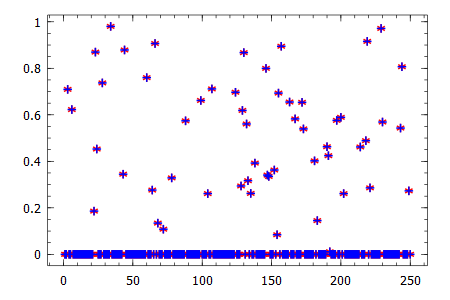

In [17]:
@manipulate for n=50:50:500, m=20:10:200, k=10:10:100
    A=svd(rand(m,n))[3]'
    for i=1:size(A,2)
        A[:,i]=A[:,i]/norm(A[:,i])
    end
    # Compute a random vector
    xs=sprand(n,1,k/n)
    x=vec(full(xs))
    # Sampling
    b=A*x
    # Recovery
    l1=linprog(ones(n),A,'=',b,0,Inf)
    plot(collect(1:n),x,"r*", collect(1:n),l1.sol,"b+")
end

Interact.Slider{Int64}(Signal{Int64}(250, nactions=0),"n",250,50:50:500,"d",true)

Interact.Slider{Int64}(Signal{Int64}(110, nactions=0),"m",110,20:10:200,"d",true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"k",50,10:10:100,"d",true)

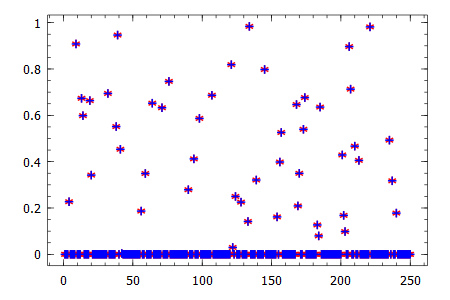

In [18]:
# Normal distribution
@manipulate for n=50:50:500, m=20:10:200, k=10:10:100
    A=rand(Normal(0,1/m),m,n)
    for i=1:size(A,2)
        A[:,i]=A[:,i]/norm(A[:,i])
    end
    # Compute a random vector
    xs=sprand(n,1,k/n)
    x=vec(full(xs))
    # Sampling
    b=A*x
    # Recovery
    l1=linprog(ones(n),A,'=',b,0,Inf)
    plot(collect(1:n),x,"r*", collect(1:n),l1.sol,"b+")
end

Interact.Slider{Int64}(Signal{Int64}(250, nactions=0),"n",250,50:50:500,"d",true)

Interact.Slider{Int64}(Signal{Int64}(110, nactions=0),"m",110,20:10:200,"d",true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"k",50,10:10:100,"d",true)

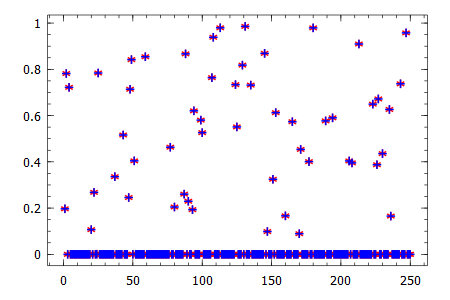

In [19]:
# Symmetric Bernoulli distribution
@manipulate for n=50:50:500, m=20:10:200, k=10:10:100
    # The matrix of (-1,1)s
    A=2*(rand(Bernoulli(0.5),m,n)-0.5)
    for i=1:size(A,2)
        A[:,i]=A[:,i]/norm(A[:,i])
    end
    # Compute a random vector
    xs=sprand(n,1,k/n)
    x=vec(full(xs))
    # Sampling
    b=A*x
    # Recovery
    l1=linprog(ones(n),A,'=',b,0,Inf)
    plot(collect(1:n),x,"r*", collect(1:n),l1.sol,"b+")
end

Interact.Slider{Int64}(Signal{Int64}(250, nactions=0),"n",250,50:50:500,"d",true)

Interact.Slider{Int64}(Signal{Int64}(110, nactions=0),"m",110,20:10:200,"d",true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"k",50,10:10:100,"d",true)

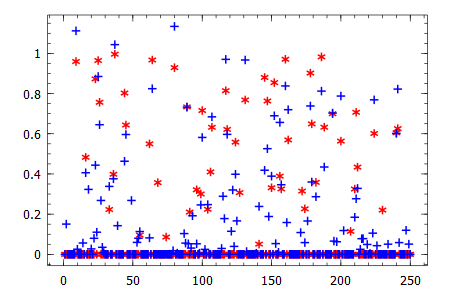

In [20]:
# Fourier matrix
@manipulate for n=50:50:500, m=20:10:200, k=10:10:100
    # Elegant way of computing the Fourier matrix
    F=fft(eye(n),1)
    # Select m/2 random rows
    ind=randperm(n)[1:round(Int,m/2)]
    Fm=F[ind,:]
    # We need to work with real matrices due to linprog()
    A=[real(Fm); imag(Fm)]
    for i=1:size(A,2)
        A[:,i]=A[:,i]/norm(A[:,i])
    end
    # Compute a random vector
    xs=sprand(n,1,k/n)
    x=vec(full(xs))
    # Sampling
    b=A*x
    # Recovery
    l1=linprog(ones(n),A,'=',b,0,Inf)
    plot(collect(1:n),x,"r*", collect(1:n),l1.sol,"b+")
end

## Signal recovery from noisy observations

In the presence of noise in observation, we want to recover a vector $x$ from 
$b=Ax + z$, where $z$ is a stochastic or deterministic unknown error term.

### Definition

The __hard thresholding operator__, $H_k(x)$, sets all but the $k$ entries of $x$ with largest magnitude to zero.

### Facts

1. The problem can be formulated as $l_1$ minimization problem
$$
\textrm{minimize}\ \|x\|_1 \quad \textrm{subject to} \quad \|Ax-b\|_2^2\leq\epsilon,
$$
where $\epsilon$ bounds the amount of noise in the data.

2. Assume that $A$ satisfies RIP of order $2k$ with $\delta_{2k}< \sqrt{2}-1$. Then the solution $x^{\star}$ of the above problem satisfies 
$$
\|x^{\star}-x\|_2 \leq C_0 \displaystyle \frac{1}{\sqrt{k}}\|x-H_k(x)\|_1
+C_1\epsilon,
$$
where $x$ is the original signal.

3. The $l_1$ problem is a convex programming problem and can be efficiently solved. The solution methods are beyond the scope of this course. 

4. If $k$ is known in advance, $A$ satisfies RIP with $\delta_{3k}<1/15$, and $\|A\|_2<1$, the $k$-sparse aproximation of $x$ can be computed
by the _Iterative Hard Thresholding_ algorithm
    1. _Initialization_: $x=0$.
    2. _Iteration_: repeat until convergence $x=H_k(x+A^T(b-Ax))$.

###  Example

We construct the $k$ sparse $x$, form $b$, add noise, and recover it with the algorithm from Fact 4. The conditions on $A$ are rather restrictive, which means that $k$ must be rather small compared to $n$ and $m$ must be rather large. For convergence, we limit the number of iterations to $50m$.

In [21]:
n=300
# k is small compared to n
k=8
x=10*sprand(n,1,k/n)
# Reset k
k=nnz(x)
# Define m, rather large
m=5*round(Int,k*log(n/k))
# Sampling matrix - normal distribution
A=rand(Normal(0,1/m),m,n)
A=A/(norm(A)+1)
# Form b
b=vec(A*x)
# Add noise
noise=rand(m)*1e-5
b+=noise

130-element Array{Float64,1}:
  0.00709015
 -0.0433549 
  0.0751256 
 -0.0496905 
  0.0625358 
  0.00687602
  0.0680395 
 -0.00794247
  0.0306503 
 -0.0170004 
 -0.0230199 
 -0.015538  
 -0.0468446 
  ⋮         
 -0.0869525 
  0.0469446 
 -0.0405866 
 -0.0539275 
 -0.00514096
 -0.0907166 
 -0.0149591 
 -0.0230431 
  0.0130682 
 -0.0321708 
  0.0307733 
  0.00302101

In [22]:
# Iterative Hard Thresholding 
function H(x::Vector,k::Int)
    y=deepcopy(x)
    ind=sortperm(abs(y),rev=true)
    y[ind[k+1:end]]=0
    y
end

H (generic function with 1 method)

In [23]:
function IHT(A::Matrix, b::Vector,k::Int)
    # Tolerance
    τ=1e-7
    x=zeros(size(A,2))
    for i=1:50*m 
        x=H(x+A'*(b-A*x),k)
    end
    x
end

IHT (generic function with 1 method)

In [24]:
norm(A),k,m

(0.17900193961491895,7,130)

In [25]:
y=IHT(A,b,k)
norm(A*x-b)/norm(b)

9.782807240003708e-5

In [26]:
# print([x y])

Let us try linear programing in the case of noisy observations.

Interact.Slider{Int64}(Signal{Int64}(250, nactions=0),"n",250,50:50:500,"d",true)

Interact.Slider{Int64}(Signal{Int64}(110, nactions=0),"m",110,20:10:200,"d",true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"k",50,10:10:100,"d",true)

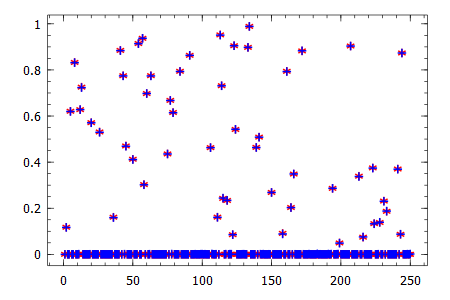

In [27]:
# Try with noise
# Normal distribution
@manipulate for n=50:50:500, m=20:10:200, k=10:10:100
    A=rand(Normal(0,1/m),m,n)
    for i=1:size(A,2)
        A[:,i]=A[:,i]/norm(A[:,i])
    end
    # Compute a random vector
    xs=sprand(n,1,k/n)
    x=vec(full(xs))
    # Sampling with noise
    b=A*x+(rand(m)-0.5)*1e-3
    # Recovery
    l1=linprog(ones(n),A,'=',b,0,Inf)
    plot(collect(1:n),x,"r*", collect(1:n),l1.sol,"b+")
end

## Sensing images

Wavelet transformation of an image is essentially sparse, since only small number of cofficients is significant. This fact can be used for compression.

Wavelet transforms are implemented the package 
[Wavelets.jl](https://github.com/JuliaDSP/Wavelets.jl).

### Example - Lena

The `tif` version of the image has `65_798` bytes, the `png` version has `58_837` bytes, and the `jpeg` version has `26_214` bytes.

In [29]:
# Pkg.add("Wavelets")

In [30]:
using Wavelets
using Colors
using Images
using TestImages

INFO: Precompiling module Wavelets.


In [31]:
whos(TestImages)

                    TestImages   4544 bytes  Module
                     testimage      0 bytes  TestImages.#testimage


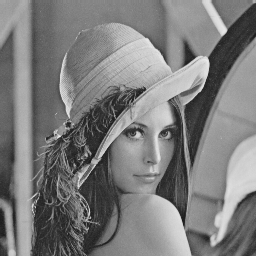

In [32]:
img=testimage("lena_gray_256")

In [33]:
show(img)

Gray Images.Image with:
  data: 256×256 Array{ColorTypes.Gray{FixedPointNumbers.UFixed{UInt8,8}},2}
  properties:
    colorspace: Gray
    spatialorder:  x y

In [34]:
# Convert the image to 32 bit floats
x=map(Float32,img.data)
sizeof(x)

262144

In [35]:
# Compute the wavelet transform of x
xt = dwt(x, wavelet(WT.haar))

256×256 Array{Float32,2}:
 124.495       -6.71057     -3.08444     …   0.00784313   0.00588235
  13.3613       7.05976      3.64234         0.0          0.00392156
   1.72757     -3.29326     -1.72175         0.00588235  -0.0215686 
  -7.82175      1.53003     -0.303433        0.0117647   -0.0196078 
  -4.88738     -3.54258     -3.62298         0.00784313  -0.0254902 
   3.04001     -0.577208     2.3989      …  -0.00588235  -0.00588239
  -2.68039     -1.09601     -7.26666        -0.00588231  -0.00784311
  -6.96011      5.94595      5.70643         0.0156863   -0.0294118 
  -0.185294     2.84927      3.40122         0.00980393   0.0254902 
   0.989705     1.15343      1.87586         0.00392157   0.00392157
   0.166299     0.231128     0.170588    …   0.00392157  -0.00196078
   0.406495     2.52341      0.162009        0.00392157   2.09548f-8
  -0.555269    -1.73223      1.8685         -0.0117647    0.0       
   ⋮                                     ⋱                ⋮         
   0.027

We now set all but the 10% absolutely largest coefficients to zero and reconstruct the image. The images are very similar, which illustrates that the wavelet transform of an image is essentially sparse.

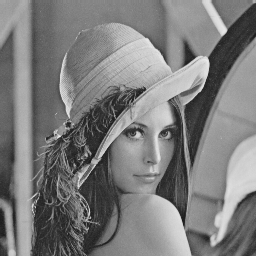

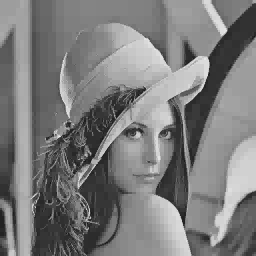

k = round(Int,τ * length(ind)) = 6554


(nothing,nothing)

In [36]:
ind=sortperm(abs(vec(xt)),rev=true)
# 0.1 = 10%, try also 0.05 = 5%
τ=0.1
@show k=round(Int,τ*length(ind))
xt1=copy(xt)
xt1[ind[k+1:end]]=0
# Inverse wavelet transform of the sparse data
xsparse=idwt(xt1, wavelet(WT.haar))
# New image
imgsparse=Images.Image(map(Gray,map(Images.Clamp01NaN(xsparse),xsparse)'))
# imgsparse=Images.Image(map(Gray,xsparse'))
display(img), display(imgsparse)

There are $k=6554$ nonzero coefficients in a sparse wavelet representation. 

Actual algorithms are elaborate. For more details see [J. Romberg, Imaging via Compressive Sampling][Rom08].

[Rom08]: http://dsp.rice.edu/files/cs/Imaging-via-CS.pdf "Justin Romberg, 'Imaging via Compressive Sampling', IEEE Signal Processing Magazine, 25(2) (2008) 14-20."